In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys

## AppStore

* Какие приложения скачиваются больше?
* Есть ли зависимость между оценками и другими параметрами?
* Платные приложения в среднем лучше бесплатных аналогов?

In [2]:
data = pd.read_csv('/Users/ian/GeekBrains/TeorVer/Course_project/AppleStore.csv')
data_descriptions = pd.read_csv('/Users/ian/GeekBrains/TeorVer/Course_project/appleStore_description.csv')

In [3]:
data.head()

,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1
1,2,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1
2,3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1
3,4,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1
4,5,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1


In [4]:
data_descriptions.head()

,id,track_name,size_bytes,app_desc
0,281656475,PAC-MAN Premium,100788224,"SAVE 20%, now only $3.99 for a limited time!\n..."
1,281796108,Evernote - stay organized,158578688,Let Evernote change the way you organize your ...
2,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,Download the most popular free weather app pow...
3,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,The eBay app is the best way to find anything ...
4,282935706,Bible,92774400,On more than 250 million devices around the wo...


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7197 entries, 0 to 7196
Data columns (total 17 columns):
Unnamed: 0          7197 non-null int64
id                  7197 non-null int64
track_name          7197 non-null object
size_bytes          7197 non-null int64
currency            7197 non-null object
price               7197 non-null float64
rating_count_tot    7197 non-null int64
rating_count_ver    7197 non-null int64
user_rating         7197 non-null float64
user_rating_ver     7197 non-null float64
ver                 7197 non-null object
cont_rating         7197 non-null object
prime_genre         7197 non-null object
sup_devices.num     7197 non-null int64
ipadSc_urls.num     7197 non-null int64
lang.num            7197 non-null int64
vpp_lic             7197 non-null int64
dtypes: float64(3), int64(9), object(5)
memory usage: 955.9+ KB


In [6]:
data_descriptions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7197 entries, 0 to 7196
Data columns (total 4 columns):
id            7197 non-null int64
track_name    7197 non-null object
size_bytes    7197 non-null int64
app_desc      7197 non-null object
dtypes: int64(2), object(2)
memory usage: 225.0+ KB


Нет пропущенных значений, столбец app_desc может быть присоединен к основному датасету по полю id.

Кроме того стоит отметить, что датасет не очень большой, так как по данным еще на 2018 год, количество приложений превышало отметку в 2.1 млн. Тем не менее попытаемся посмотреть на него и сделать какие-то выводы

Добавим несколько колонок:

In [7]:
data = pd.merge(data, data_descriptions[['id', 'app_desc']], on='id', how='left')
data['size_in_Mb'] = data.size_bytes.apply(lambda x : x/1048576)
data['description_length'] = data['app_desc'].apply(lambda x: len(x))
data.head()

,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic,app_desc,size_in_Mb,description_length
0,1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1,"SAVE 20%, now only $3.99 for a limited time!\n...",96.119141,1533
1,2,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1,Let Evernote change the way you organize your ...,151.232422,3952
2,3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1,Download the most popular free weather app pow...,95.867188,2090
3,4,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1,The eBay app is the best way to find anything ...,122.558594,3997
4,5,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1,On more than 250 million devices around the wo...,88.476562,2998


В датасете присутствуют как платные так и бесплатные приложения. Посмотрим на их количество

In [8]:
Free = len(data.loc[data['price'] == 0])
Paid = len(data.loc[data['price'] != 0])
Total = len(data['price'])

Free_percent = Free * 100 / Total
Paid_percent = Paid * 100 / Total

print(f'В датасете всего {Free} бесплатных приложений, что составляет {Free_percent:0.2f}% от всех приложений')
print(f'В датасете всего {Paid} платных приложений, что составляет {Paid_percent:0.2f}% от всех приложений')

В датасете всего 4056 бесплатных приложений, что составляет 56.36% от всех приложений
В датасете всего 3141 платных приложений, что составляет 43.64% от всех приложений


Визуализируем эти данные для наглядности:

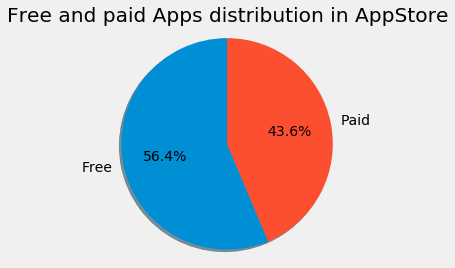

In [9]:
plt.style.use('fivethirtyeight')

labels = 'Free', 'Paid'
sizes = [Free_percent, Paid_percent]


fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal') 
plt.title('Free and paid Apps distribution in AppStore')

plt.show()

Добавим признак 'IsNotFree'

In [10]:
data['isNotFree'] = data['price'].apply(lambda x: 1 if x > 0 else 0)

In [11]:
data['currency'].unique()

array(['USD'], dtype=object)

Все цены приведены в долларах США, нет необходимости дополнительно обрабатывать это поле

Посмотрим на распределение по жанрам

In [12]:
data['prime_genre'].unique()

array(['Games', 'Productivity', 'Weather', 'Shopping', 'Reference',
       'Finance', 'Music', 'Utilities', 'Travel', 'Social Networking',
       'Sports', 'Business', 'Health & Fitness', 'Entertainment',
       'Photo & Video', 'Navigation', 'Education', 'Lifestyle',
       'Food & Drink', 'News', 'Book', 'Medical', 'Catalogs'],
      dtype=object)

In [13]:
len(data['prime_genre'].unique())

23

In [14]:
free_for_each_genre = np.array(data[data.price == 0].prime_genre.value_counts().sort_index().tolist())
paid_for_each_genre = np.array(data[data.price != 0].prime_genre.value_counts().sort_index().tolist())
total_for_each_genre = np.array(data.prime_genre.value_counts().sort_index().tolist())

free_percent_per_genre = free_for_each_genre * 100 / total_for_each_genre
paid_percent_for_each_genre = paid_for_each_genre * 100 / total_for_each_genre

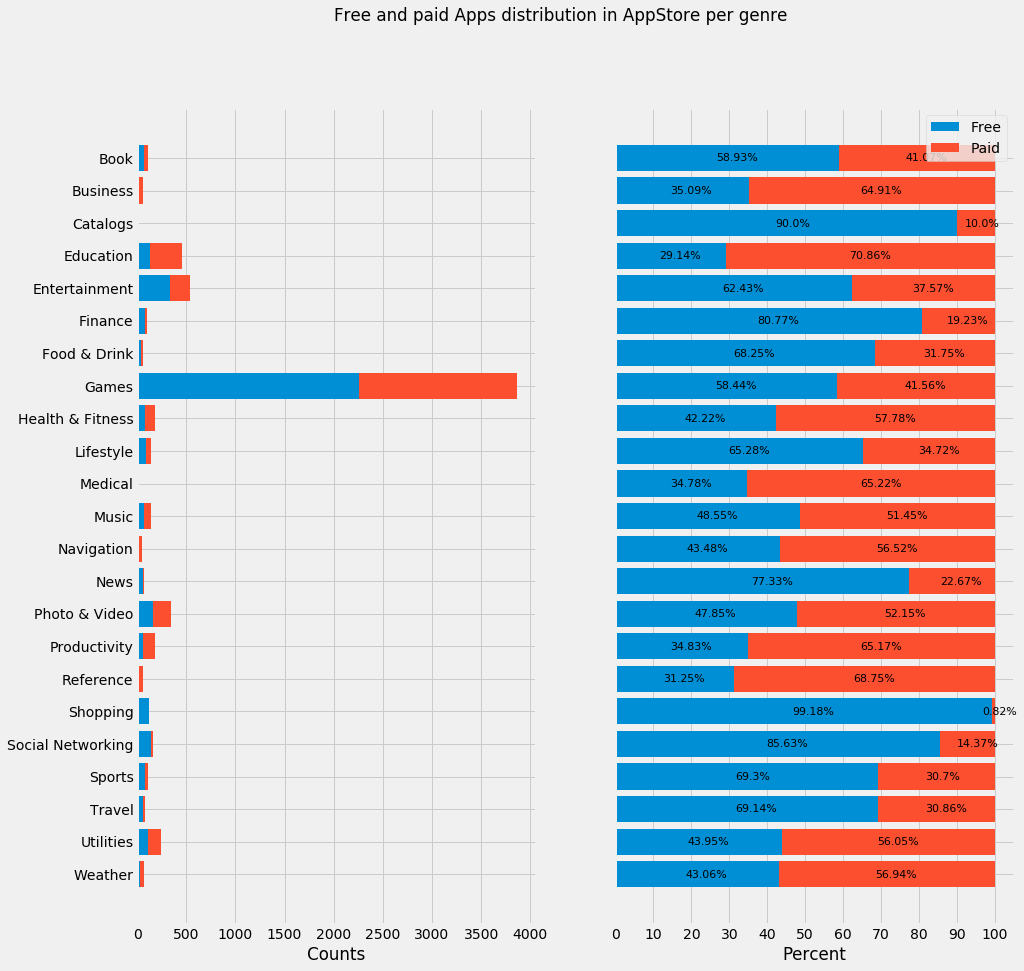

In [15]:
ax2_dims = (14, 14)

fig2 = plt.figure(figsize=ax2_dims)

ax2, ax3 = fig2.subplots(1, 2, sharey=True)

ind = np.arange(len(data['prime_genre'].value_counts().sort_index()))
width = 0.8

ax2.barh(ind, free_for_each_genre, width)
ax2.barh(ind, paid_for_each_genre, width, left=free_for_each_genre)

p1 = ax3.barh(ind, free_percent_per_genre, width)
p2 = ax3.barh(ind, paid_percent_for_each_genre, width, left=free_percent_per_genre)

for idx, item in enumerate(ax3.patches):
    if idx < len(ax3.patches) / 2:
        ax3.text(item.get_width() / 2 - 3, item.get_y()+0.5, \
                 str(round((item.get_width()), 2))  + '%', fontsize=11, color='black')
    else:
        ax3.text((item.get_width() / 2) + (ax3.patches[ax3.patches.index(item) - 23].get_width()) - 3, item.get_y()+.5, \
                 str(round((item.get_width()), 2))  + '%', fontsize=11, color='black')
        
plt.yticks(ind, data['prime_genre'].value_counts().sort_index().index)
ax2.set_xlabel('Counts')
ax3.set_xlabel('Percent')
ax3.set_xticks(10*np.arange(11))

plt.legend((p1[0], p2[0]), ('Free', 'Paid'))

ax2.invert_yaxis()
ax3.invert_yaxis()

plt.suptitle('Free and paid Apps distribution in AppStore per genre')
plt.show()

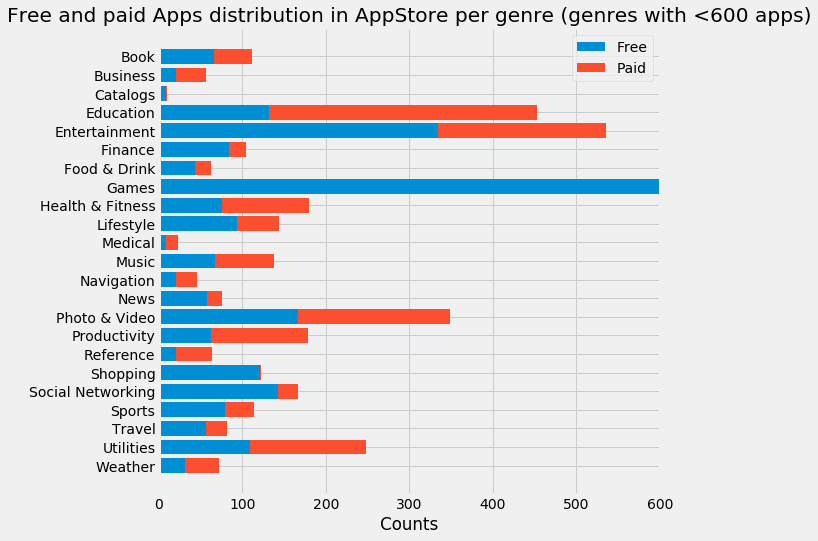

In [16]:
# Увеличенный график, x от 0 до 600
fig4, ax4 = plt.subplots(figsize=(8, 8))


ind = np.arange(len(data['prime_genre'].value_counts().sort_index()))
width = 0.8

ax4.barh(ind, free_for_each_genre, width)
ax4.barh(ind, paid_for_each_genre, width, left=free_for_each_genre)

plt.yticks(ind, data['prime_genre'].value_counts().sort_index().index)

ax4.set_xlim([0, 600])
plt.legend((p1[0], p2[0]), ('Free', 'Paid'))
ax4.invert_yaxis()
ax4.set_xlabel('Counts')
plt.title('Free and paid Apps distribution in AppStore per genre (genres with <600 apps)')
 
plt.show()

Промежуточные выводы:
1. Большинство приложений в iTunes - бесплатные
2. Представлено 23 различных жанра, при этом игра производится подавляющее большинство
3. Категории, где сильно (>60%) преобладают платные приложения:
    * Reference (различные словари, гайды, читы)
    * Productivity
    * Medical
    * Education
    * Buisness
    
    Вероятно в этих категориях создаются приложения, которые распространяют или производят действительно полезный и ценный контент
4. К сожалению, нет статистики о встроенных покупках. Интересно было бы посмотреть, сколько бесплатных приложений их используют.

### Рейтинги

Посмотрим, как распределены рейтинги

In [17]:
print(f'Средний рейтинг по всем приложениям на основе {data.rating_count_tot.sum()} оценок: {data.user_rating.mean():.2f}')
print(f'Средний рейтинг среди бесплатных приложений на основе {data[data.price == 0].rating_count_tot.sum()} оценок:' + 
      f' {data[data.price == 0].user_rating.mean():.2f}')
print(f'Средний рейтинг среди платных приложений на основе {data[data.price != 0].rating_count_tot.sum()} оценок:' +
      f' {data[data.price != 0].user_rating.mean():.2f}')

Средний рейтинг по всем приложениям на основе 92790253 оценок: 3.53
Средний рейтинг среди бесплатных приложений на основе 80105208 оценок: 3.38
Средний рейтинг среди платных приложений на основе 12685045 оценок: 3.72


И рейтинги текущих версий:

In [18]:
print(f'Средний рейтинг текущих версий на основе {data.rating_count_ver.sum()} оценок по всем приложениям: ' +
      f'{data.user_rating_ver.mean():.2f}')
print(f'Средний рейтинг текущих версий на основе {data[data.price == 0].rating_count_ver.sum()} оценок среди бесплатных ' + 
      f'приложений: {data[data.price == 0].user_rating_ver.mean():.2f}')
print(f'Средний рейтинг текущих версий на основе {data[data.price != 0].rating_count_ver.sum()} оценок среди платных' + 
      f'приложений: {data[data.price != 0].user_rating_ver.mean():.2f}')

Средний рейтинг текущих версий на основе 3313311 оценок по всем приложениям: 3.25
Средний рейтинг текущих версий на основе 2309490 оценок среди бесплатных приложений: 3.06
Средний рейтинг текущих версий на основе 1003821 оценок среди платныхприложений: 3.50


Мы видим:
* что средний рейтинг текущих версий по всем приложениям ниже, чем средний рейтинг за все время. Вообще говоря, это не стыкуется с банальной логикой о том, что разработчики стараются улучшать свои приложения с выходом новых версий.
* платные приложения в среднем обладают большим рейтингом
* при этом, пользователи платных приложений намного менее активны, чем пользователи бесплатных. Отчасти это может быть связано с тем, что в бесплатных приложениях, особенно играх, которых представлено большинство, часто можно получить какие-то бонусы за постановку оценки.

Построим матрицу корреляций для выявления возможных линейных зависимостей:

In [19]:
data['cont_rating'] = data.cont_rating.apply(lambda x: int(x[:-1]))

In [20]:
data.head()

,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,...,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic,app_desc,size_in_Mb,description_length,isNotFree
0,1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,...,4,Games,38,5,10,1,"SAVE 20%, now only $3.99 for a limited time!\n...",96.119141,1533,1
1,2,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,...,4,Productivity,37,5,23,1,Let Evernote change the way you organize your ...,151.232422,3952,0
2,3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,...,4,Weather,37,5,3,1,Download the most popular free weather app pow...,95.867188,2090,0
3,4,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,...,12,Shopping,37,5,9,1,The eBay app is the best way to find anything ...,122.558594,3997,0
4,5,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,...,4,Reference,37,5,45,1,On more than 250 million devices around the wo...,88.476562,2998,0


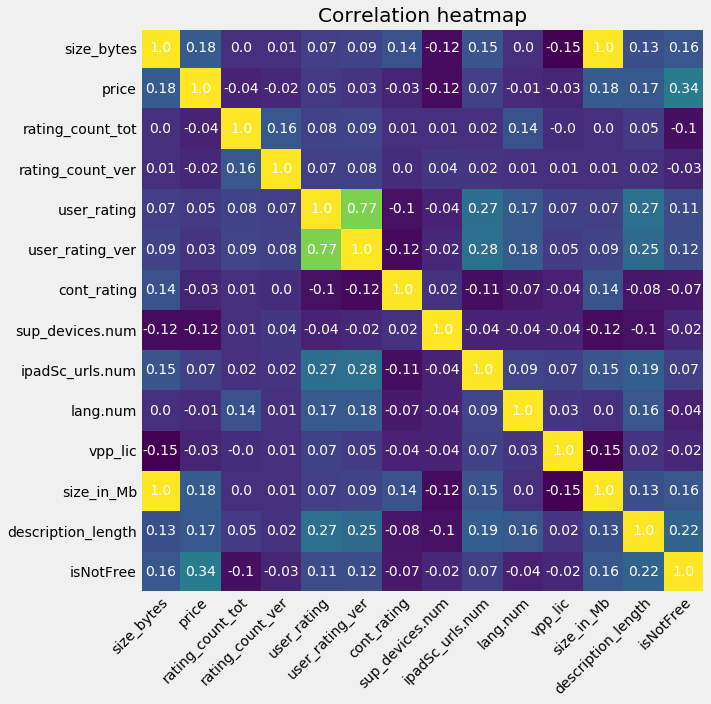

In [21]:
data_corr = data.drop(['Unnamed: 0', 'id'], axis=1).corr()

fig5, ax5 = plt.subplots(figsize=(10, 10))
im = ax5.imshow(data_corr)

ax5.set_xticks(np.arange(len(data_corr)))
ax5.set_yticks(np.arange(len(data_corr)))

ax5.set_xticklabels(data_corr.index)
ax5.set_yticklabels(data_corr.index)

plt.setp(ax5.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

for i in range(len(data_corr.index)):
    for j in range(len(data_corr.index)):
        text = ax5.text(j, i, round(data_corr.iloc[i, j], 2),
                       ha="center", va="center", color="w")

ax5.set_title("Correlation heatmap")
fig5.tight_layout()
ax5.grid(False)
plt.show()

Из матрицы выше видим, что на у пользовательских оценок наиболее сильная полодительная корреляция наблюдается с длиной описания, а также параметрами lang.num и ipadSc_urls.num, которые показывают количество поддерживаемых языков и количество скриншотов в описании соответственно. Взаимосвязи несильные, но тем не менее они есть. Логично предположить, что пользователи более лояльны к приложениям, от которых они знают, чего ожидать, благодаря подробному описанию со скриншотами (здесь можно сказать, что если описание достаточно подробно, то пользователи, которым приложение могло бы не понравиться обойдут его стороной, не найдя нужных им функций), а количество поддерживаемых языков напрямую влияет на удобство пользования, что не может не сказываться на рейтингах. С остальными параметрами либо нет зависимости вообще, либо она нелинейна.

Посмотрим на распределение оценок. Из данных, полученных выше для средних значений мы можем сделать вывод, что даже если оно и похоже на нормальное, то имеет перекос в положительную сторону.

Text(0, 0.5, 'Number of apps')

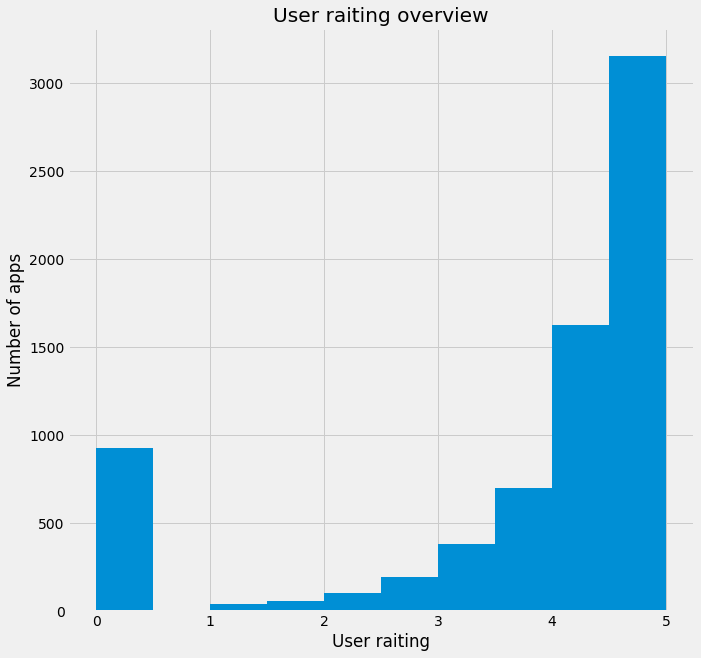

In [22]:
fig5, ax5 = plt.subplots(figsize=(10, 10))

ax5 = plt.hist(data.user_rating, bins=10)
plt.title('User raiting overview')
plt.xlabel('User raiting')
plt.ylabel('Number of apps')

Видим, что в датасете присутствует довольно много нулевых оценок. В остальном оценки растут экспоненциально.

In [23]:
data[data.user_rating == 0].head()

,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,...,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic,app_desc,size_in_Mb,description_length,isNotFree
199,227,329174056,iLoan Calc (Loan calculator),3375104,USD,3.99,0,0,0.0,0.0,...,4,Finance,37,5,3,1,iLoan Calc is a loan simulator application whe...,3.218750,2449,1
301,340,350480010,eBook: War and Peace,8039424,USD,3.99,0,0,0.0,0.0,...,9,Book,37,5,1,1,Enjoy reading ebook War and Peace with auto-sc...,7.666992,1314,1
330,371,355709084,Jourist Weltübersetzer,147066880,USD,7.99,0,0,0.0,0.0,...,4,Travel,40,5,1,1,Ab sofort haben Sie Ihren ganz persönlichen Do...,140.253906,2659,1
441,503,377321278,恵方コンパス.,41207059,USD,0.00,0,0,0.0,0.0,...,4,Navigation,39,5,1,1,恵方とは：\n方位神の一つで、その年の福徳を司る吉神である歳徳神(としとくじん)の方位を恵方...,39.298114,280,0
452,517,379256460,「宅建士」過去問題《受験用》,24444928,USD,3.99,0,0,0.0,0.0,...,4,Education,37,0,1,1,====================\nシリーズ累計DL15万本突破！\n誠にありがとう...,23.312500,1404,1


Видно, что нулевые оценки имеют приложения, у которых пока вообще нет оценок. Снова посмотрим на средние значения, убрав из рассмотрения нули. Вероятно предыдущие выводы были неверными

In [24]:
data_temp = data.drop(data[data.user_rating == 0].index)

In [25]:
print(f'Средний рейтинг по всем приложениям на основе {data_temp.rating_count_tot.sum()} оценок: ' + 
      f'{data_temp.user_rating.mean():.2f}')
print(f'Средний рейтинг среди бесплатных приложений на основе {data_temp[data_temp.price == 0].rating_count_tot.sum()} оценок:' + 
      f' {data_temp[data_temp.price == 0].user_rating.mean():.2f}')
print(f'Средний рейтинг среди платных приложений на основе {data_temp[data_temp.price != 0].rating_count_tot.sum()} оценок:' +
      f' {data_temp[data_temp.price != 0].user_rating.mean():.2f}')

Средний рейтинг по всем приложениям на основе 92790253 оценок: 4.05
Средний рейтинг среди бесплатных приложений на основе 80105208 оценок: 4.05
Средний рейтинг среди платных приложений на основе 12685045 оценок: 4.05


In [26]:
print(f'Средний рейтинг текущих версий на основе {data_temp.rating_count_ver.sum()} оценок по всем приложениям: ' +
      f'{data_temp.user_rating_ver.mean():.2f}')
print(f'Средний рейтинг текущих версий на основе {data_temp[data_temp.price == 0].rating_count_ver.sum()} оценок среди' + 
      f' бесплатных приложений: {data_temp[data_temp.price == 0].user_rating_ver.mean():.2f}')
print(f'Средний рейтинг текущих версий на основе {data_temp[data_temp.price != 0].rating_count_ver.sum()} оценок среди' + 
      f' платных приложений: {data_temp[data_temp.price != 0].user_rating_ver.mean():.2f}')

Средний рейтинг текущих версий на основе 3313311 оценок по всем приложениям: 3.74
Средний рейтинг текущих версий на основе 2309490 оценок среди бесплатных приложений: 3.67
Средний рейтинг текущих версий на основе 1003821 оценок среди платных приложений: 3.81


* Рейтинг за все время выравнялся
* Текущие версии по-прежнему собирают в среднем оценки хуже
* Однако плантные приложения по-прежнему лучше

Посмотрим как распределяются средние рейтинги по категориям

In [27]:
free_for_each_genre = np.array(data[data.price == 0].prime_genre.value_counts().sort_index().tolist())
paid_for_each_genre = np.array(data[data.price != 0].prime_genre.value_counts().sort_index().tolist())
total_for_each_genre = np.array(data.prime_genre.value_counts().sort_index().tolist())

free_percent_per_genre = free_for_each_genre * 100 / total_for_each_genre
paid_percent_for_each_genre = paid_for_each_genre * 100 / total_for_each_genre

In [28]:
mean_user_raiting_per_genre_free = np.array(data[['prime_genre', 
                                         'user_rating']].loc[data.price == 0].groupby('prime_genre').mean())
mean_user_raiting_per_genre_paid = np.array(data[['prime_genre', 
                                         'user_rating']].loc[data.price != 0].groupby('prime_genre').mean())
indexes = data[['prime_genre', 'user_rating']].loc[data.price == 0].groupby('prime_genre').mean().index

In [29]:
list_of_free_values = [float(x) for x in mean_user_raiting_per_genre_free]
list_of_paid_values = [float(x) for x in mean_user_raiting_per_genre_paid]

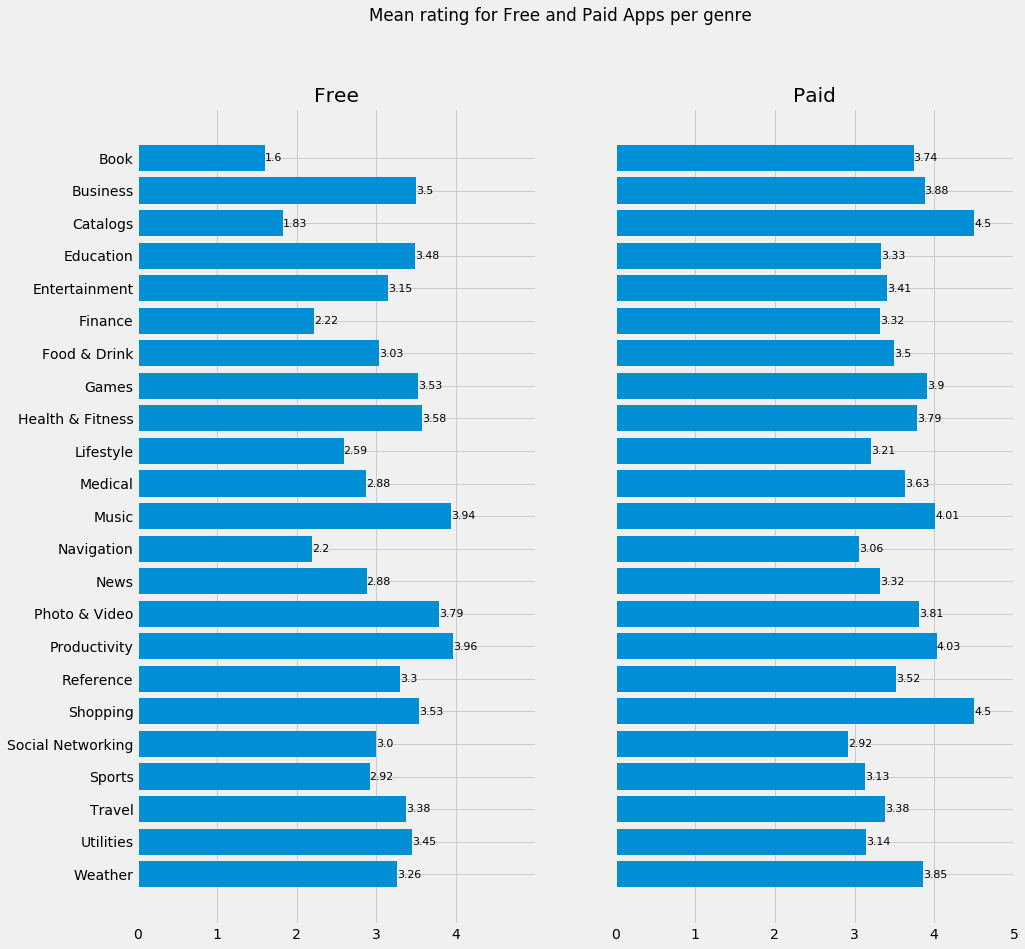

In [30]:
fig6 = plt.figure(figsize=(14, 14))

ax6, ax7 = fig6.subplots(1, 2, sharey=True)

ind = np.arange(len(indexes))
height = 0.8

ax6.barh(ind, list_of_free_values, height)
ax7.barh(ind, list_of_paid_values, height)

for idx, item in enumerate(ax6.patches):
        ax6.text(item.get_width(), item.get_y()+0.5, \
                 str(round((item.get_width()), 2)), fontsize=11, color='black')
        
for idx, item in enumerate(ax7.patches):
        ax7.text(item.get_width(), item.get_y()+0.5, \
                 str(round((item.get_width()), 2)), fontsize=11, color='black')

plt.yticks(ind, indexes)
ax6.set_title('Free')
ax7.set_title('Paid')

ax6.invert_yaxis()
ax7.invert_yaxis()
ax6.set_xticks(np.arange(5))
ax6.set_xlim(0, 5)
ax7.set_xlim(0, 5)

plt.suptitle('Mean rating for Free and Paid Apps per genre')
plt.show()

Действительно видим, что для многих групп средние оценки выше в платных версиях приложений. Это не так только для групп:
* Education
* Social Networking
* Utilities

In [31]:
mean_rating_count_per_genre_free = np.array(data[['prime_genre', 
                                         'rating_count_tot']].loc[data.price == 0].groupby('prime_genre').aggregate(sum))
mean_rating_count_per_genre_paid = np.array(data[['prime_genre', 
                                         'rating_count_tot']].loc[data.price != 0].groupby('prime_genre').aggregate(sum))
indexes_2 = data[['prime_genre', 'rating_count_tot']].loc[data.price == 0].groupby('prime_genre').aggregate(sum).index

list_of_free_values_2 = [float(x) for x in mean_rating_count_per_genre_free]
list_of_paid_values_2 = [float(x) for x in mean_rating_count_per_genre_paid]

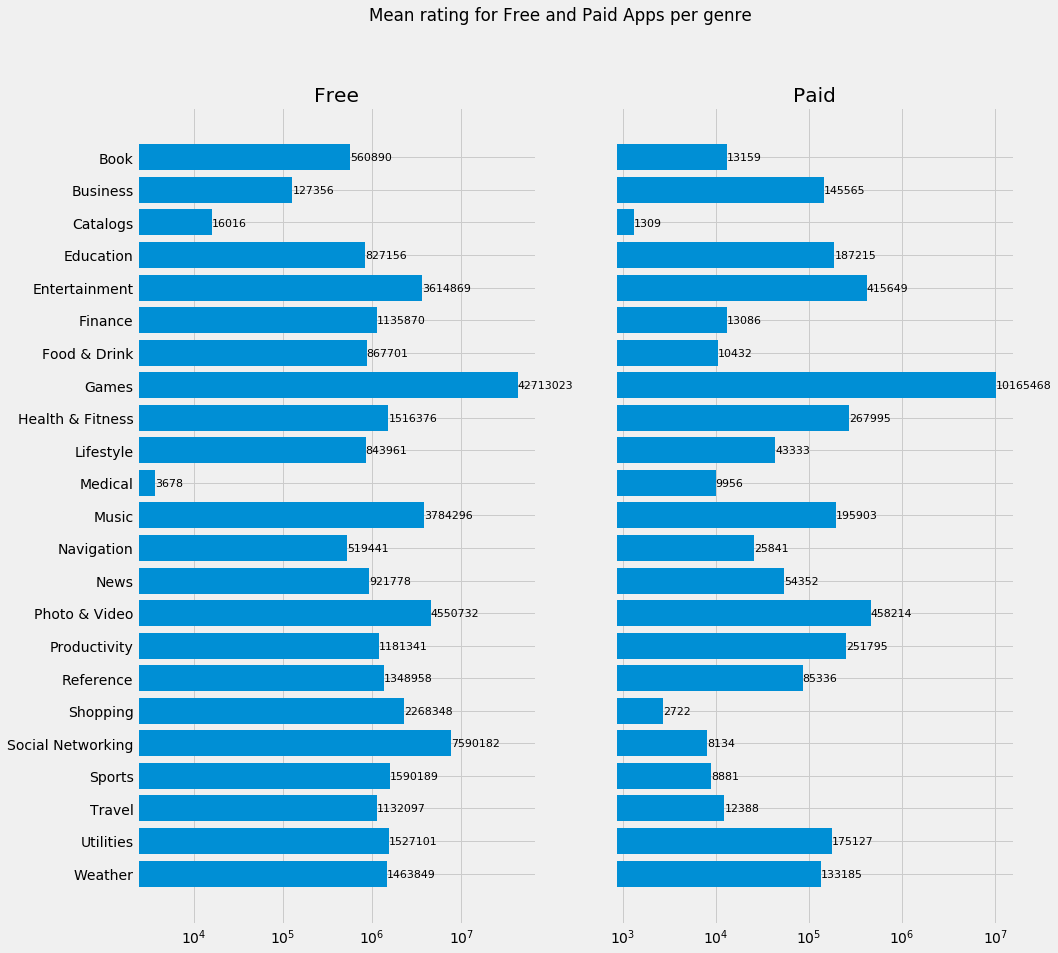

In [32]:
fig8 = plt.figure(figsize=(14, 14))

ax8, ax9 = fig8.subplots(1, 2, sharey=True)

ind = np.arange(len(indexes_2))
height = 0.8

ax8.barh(ind, list_of_free_values_2, height, log=True)
ax9.barh(ind, list_of_paid_values_2, height, log=True)

for idx, item in enumerate(ax8.patches):
        ax8.text(item.get_width(), item.get_y()+0.5, \
                 str(int((item.get_width()))), fontsize=11, color='black')
        
for idx, item in enumerate(ax9.patches):
        ax9.text(item.get_width(), item.get_y()+0.5, \
                 str(int((item.get_width()))), fontsize=11, color='black')

plt.yticks(ind, indexes_2)
ax8.set_title('Free')
ax9.set_title('Paid')

ax8.invert_yaxis()
ax9.invert_yaxis()

plt.suptitle('Mean rating for Free and Paid Apps per genre')
plt.show()

Видим, что пользователи платных приложений намного менее активны. Это не так только для приложений из категории Medical, которых в датасете представлено не очень много и большинство из них платные.